In [27]:
import numpy as np
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt

def sample_normal(low, high, n, confidence=99):
    if confidence == 90:
        z = 1.645
    elif confidence == 95:
        z = 1.96
    elif confidence == 99:
        z = 2.575
    else:
        raise ValueError("Confidence level must be 90, 95, or 99")
    mean = np.mean([high, low])
    stdev = (high - mean) / z
    samples = np.abs(norm.rvs(loc=mean, scale=stdev, size=n))
    
    # Plotting
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, stdev)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mean = %.2f,  std = %.2f" % (mean, stdev)
    plt.title(title)
    plt.show()
    
    return samples

def sample_lognormal(low, high, n, confidence=90):
    if confidence == 90:
        z = 1.645
    elif confidence == 95:
        z = 1.96
    elif confidence == 99:
        z = 2.575
    else:
        raise ValueError("Confidence level must be 90, 95, or 99")
    logHigh = np.log(high)
    logLow = np.log(low)
    
    mean = np.mean([logHigh, logLow])
    stdev = (logHigh - logLow) / (2 * z)
    scale = np.exp(mean)
    samples = np.abs(lognorm.rvs(s=stdev, scale=scale, size=n))
    
    # Plotting
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = lognorm.pdf(x, s=stdev, scale=scale)
    plt.plot(x, p, 'k', linewidth=2)
    # title = "Lognormal Fit results: mean = %.2f,  std = %.2f" % (np.log(scale), stdev)
    title = "Lognormal Fit results"
    plt.title(title)
    plt.show()
    
    return samples


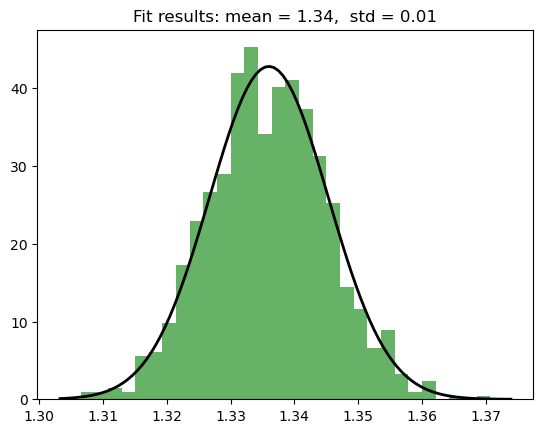

Mean:  1.335937905624116


In [19]:
samples = sample_normal(1.312, 1.360, 1000, confidence=99)
print("Mean: ", np.mean(samples))

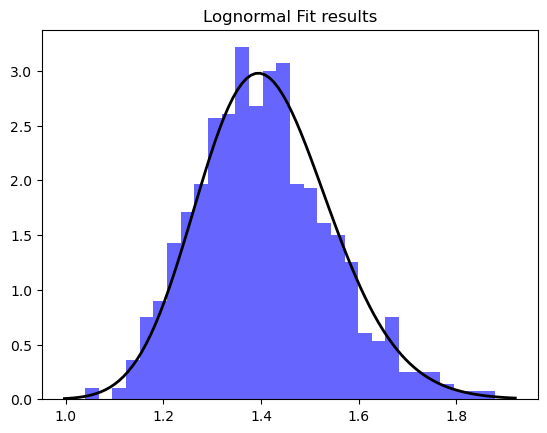

Mean: 1.4055000890518763


In [30]:
samples = sample_lognormal(1.1, 1.8, 1000, confidence=99)
print(f"Mean: {np.mean(samples)}")